# Thesis Codes  by Korkut Anapa

# DW AWASH INTELLIGENT CLEANING CYCLE DESIGNER

## Optimization Model
Create a software that can design a cycle according to customer preferences

In [8]:
import numpy as np
import pandas as pd
from numpy import mean
from numpy import std
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from matplotlib import pyplot
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
import matplotlib as mpl
import matplotlib.pyplot as plt
import joblib

In [9]:
df = pd.read_excel('D:/Users/ar600780/OneDrive - ARÇELİK A.Ş/Desktop/dataset_elsevier/dbso60sort.xlsx')

In [22]:
var_CPI=['1PWTemperature', '1PWWaiting', '2MWPeriod', '2MWRPM', '3MFPeriod',
       '4CRPeriod', '4CRRPM', '4CRTop_Spray_Circulation_Period', '7RSRPM',
       '8DSRPM']
var_DPI=['1PWTemperature', '2MWPeriod', '2MWTop_Spray_Circulation_Period',
       '8DSClosed_Cycle_Period', '10DYFan', '10DYFan_Flap',
       '10DYExtra_Heater_Offset']
var_EC=['1PWCirculation_Period', '1PWTemperature', '2MWPeriod',
       '4CRLower_Spray_Circulation_Period',
       '4CRUpper_Spray_Circulation_Period', '7RSTemperature',
       '7RSLower_Spray_Circulation_Period', '10DYPeriod', '10DYWaiting',
       '10DYFan_Flap']
var_WC=['1PWClosed_Cycle_Period', '1PWWaterInlet', '1PWRPM', '1PWTemperature',
       '2MWClosed_Cycle_Period', '2MWWaterInlet', '2MWRPM', '4CRPeriod',
       '4CRWaterInlet', '4CRTop_Spray_Circulation_Period',
       '7RSClosed_Cycle_Period', '7RSPeriod', '7RSRPM',
       '7RSLower_Spray_Circulation_Period', '8DSClosed_Cycle_Period',
       '10DYPeriod', '10DYExtra_Heater_Offset']
var_TD=['1PWPeriod', '1PWTemperature', '2MWClosed_Cycle_Period', '2MWPeriod',
       '2MWLower_Spray_Circulation_Period', '7RSPeriod', '7RSRPM',
       '8DSClosed_Cycle_Period', '10DYPeriod']


filename = 'td.sav'
model_td = joblib.load(filename)
filename = 'ec.sav'
model_ec = joblib.load(filename)
filename = 'dpi.sav'
model_dpi = joblib.load(filename)
filename = 'cpi.sav'
model_cpi = joblib.load(filename)
filename = 'wc.sav'
model_wc = joblib.load(filename)

dataset2=[
'1PWRPM',
'1PWTemperature',
'1PWLower_Spray_Circulation_Period',
'1PWWaiting',
'1PWCirculation_Period',
'1PWClosed_Cycle_Period',
'1PWPeriod',
'1PWTop_Spray_Circulation_Period',
'1PWWaterInlet',
'2MWRPM',
'2MWTemperature',
'2MWLower_Spray_Circulation_Period',
'2MWClosed_Cycle_Period',
'2MWPeriod',
'2MWTop_Spray_Circulation_Period',
'2MWWaterInlet',
'3MFPeriod',
'4CRRPM',
'4CRLower_Spray_Circulation_Period',
'4CRPeriod',
'4CRTop_Spray_Circulation_Period',
'4CRUpper_Spray_Circulation_Period',
'4CRWaterInlet',
'7RSRPM',
'7RSTemperature',
'7RSLower_Spray_Circulation_Period',
'7RSClosed_Cycle_Period',
'7RSPeriod',
'7RSUpper_Spray_Circulation_Period',
'8DSRPM',
'8DSClosed_Cycle_Period',
'10DYWaiting',
'10DYFan',
'10DYFan_Flap',
'10DYExtra_Heater_Offset',
'10DYDoor_Openening',
'10DYPeriod']

X_WC=df[var_WC]
X_TD=df[var_TD]
X_EC=df[var_EC]
X_CPI=df[var_CPI]
X_DPI=df[var_DPI]

# Select base program 
## Design a new Eco program with new targets

In the dataset there are different programs. If we want some other restrictions like water level etc we can use other base programs like water with 6lt etc. 

In [23]:
df_base = pd.read_excel('D:/Users/ar600780/OneDrive - ARÇELİK A.Ş/Desktop/dataset_elsevier/DB_SO_eco_sort.xlsx')

In [24]:
X_base=df_base[dataset2]

In [25]:
X_base

,1PWRPM,1PWTemperature,1PWLower_Spray_Circulation_Period,1PWWaiting,1PWCirculation_Period,1PWClosed_Cycle_Period,1PWPeriod,1PWTop_Spray_Circulation_Period,1PWWaterInlet,2MWRPM,...,7RSPeriod,7RSUpper_Spray_Circulation_Period,8DSRPM,8DSClosed_Cycle_Period,10DYWaiting,10DYFan,10DYFan_Flap,10DYExtra_Heater_Offset,10DYDoor_Openening,10DYPeriod
0,2800,54,13.5,0,40,6,43,9.333333,4,3000,...,28,12,2400,0,80,0,0,0,1,82


In [26]:
xl=[]
xu=[]
xm=[]

In [27]:
X=X_base
for term in X:
    xl.append(0.90*min(X_base[term]))
    xu.append(1.10*max(X_base[term]))
    xm.append(X_base[term])

In [28]:
from pymoo.algorithms.moo.ctaea import CTAEA
from pymoo.problems import get_problem
from pymoo.util.ref_dirs import get_reference_directions
from pymoo.optimize import minimize
from pymoo.visualization.scatter import Scatter
from pymoo.problems.single import Rastrigin
from pymoo.core.problem import ElementwiseProblem
from pymoo.operators.crossover.sbx import SBX
from pymoo.operators.mutation.pm import PM
from pymoo.operators.sampling.rnd import FloatRandomSampling
import time

In [32]:
st = time.time()
class MyProblem(ElementwiseProblem):
    def __init__(self):
        super().__init__(n_var=37,
                         n_obj=5,
                         n_ieq_constr=0,
                         xl=xl,
                         xu=xu)
    def _evaluate(self, x, out, *args, **kwargs):
            my_array5 = np.array([[ x[5], x[8], x[0], x[1], x[12], x[15],  x[9],  x[19], x[22],
                                  x[20], x[26], x[27], x[23], x[25], x[30],  x[36],  x[34]]], dtype=float)
            
            my_array2 = np.array([[   x[1],  x[13],  x[14], x[30],x[32],x[33],x[34] ]], dtype=float)
            
            
            my_array3 = np.array([[  x[4], x[1], x[13], x[18], x[21], x[24], x[25],  x[36], x[31],  x[33]]], dtype=float)
            
            my_array4 = np.array([[    x[6],  x[1],  x[12], x[13],  x[18],  x[27], x[23], x[30], x[36]]], dtype=float)
            
            my_array1 = np.array([[ x[1],   x[3], x[13],  x[9],  x[16], x[19],
                                 x[17], x[20], x[23],  x[29]]], dtype=float)
                            
            df1 = pd.DataFrame(my_array1, columns = X_CPI.columns )
            df2 = pd.DataFrame(my_array2, columns = X_DPI.columns)
            df3 = pd.DataFrame(my_array3, columns = X_EC.columns)
            df4 = pd.DataFrame(my_array4, columns = X_TD.columns)
            df5 = pd.DataFrame(my_array5, columns = X_WC.columns)
                            
            f1 =  model_cpi.predict(df1)
            f2 =  model_dpi.predict(df2)
            f3 =  model_ec.predict(df3)
            f4 =  model_td.predict(df4)      
            f5 =  model_wc.predict(df5)  
            out["F"] = [-f1, -f2, f3, f4,f5]


problem = MyProblem()

ref_dirs = get_reference_directions("das-dennis", problem.n_obj, n_points=1820)
algorithm = CTAEA(ref_dirs=ref_dirs)

# execute the optimization
res = minimize(problem,
               algorithm,
               ('n_gen', 50),
               seed=1,
               verbose=False
               )

et = time.time()
elapsed_time = et - st
print('Execution time:', elapsed_time, 'seconds')

Execution time: 785.5589361190796 seconds


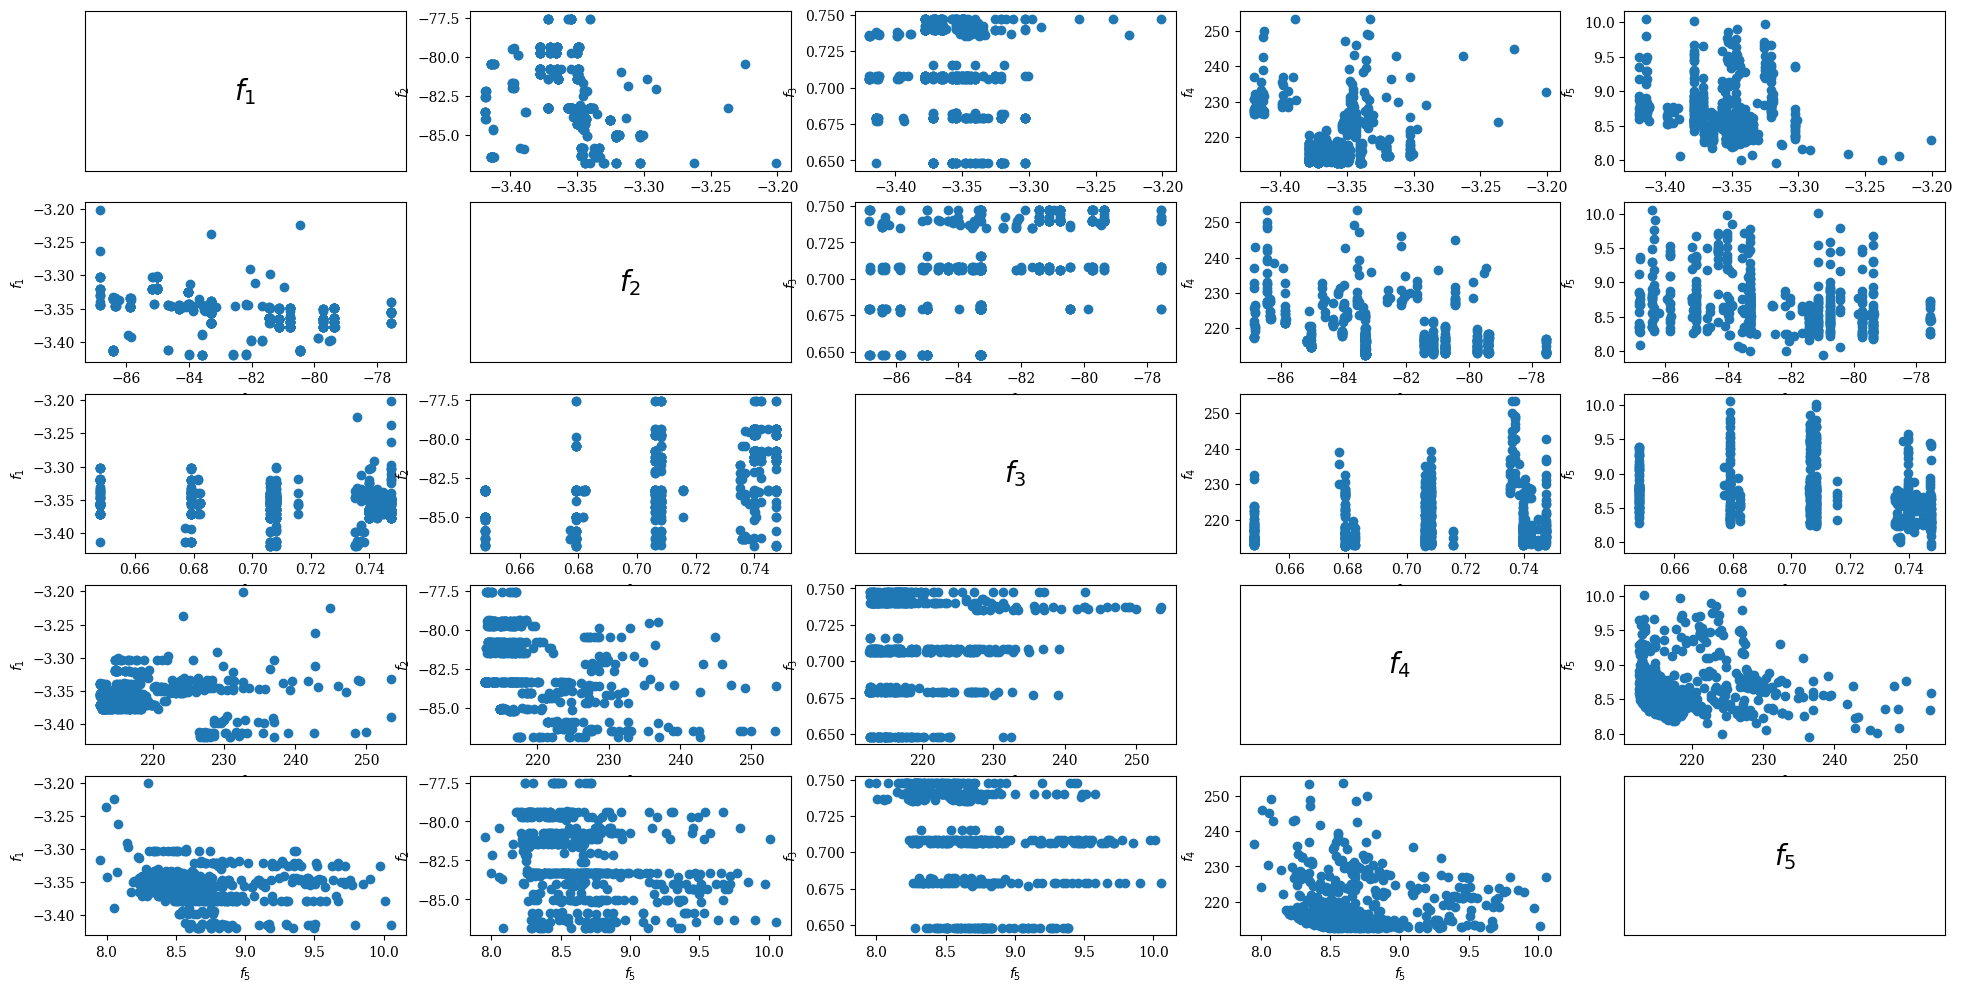

In [33]:
X = res.X
F = res.F
Scatter(figsize=(24,12)).add(res.F).show()

In [34]:
from pymoo.indicators.hv import HV
ref_point = np.array([-3.0,-70,1.0,300,12])
ind = HV(ref_point=ref_point)
print("HV", ind(F))


HV 805.3605091560617


In [35]:
F = res.F
xl, xu = problem.bounds()
fl = F.min(axis=0)
fu = F.max(axis=0)
print(f"Scale f1: [{fl[0]}, {fu[0]}]")
print(f"Scale f2: [{fl[1]}, {fu[1]}]")
print(f"Scale f3: [{fl[2]}, {fu[2]}]")
print(f"Scale f4: [{fl[3]}, {fu[3]}]")
print(f"Scale f5: [{fl[4]}, {fu[4]}]")

Scale f1: [-3.4193552319027782, -3.2010275774942127]
Scale f2: [-86.83773415948805, -77.54713077303364]
Scale f3: [0.648, 0.7474912280701754]
Scale f4: [212.5979185708768, 253.49209536148703]
Scale f5: [7.950752312305061, 10.054836770662774]


In [36]:
approx_ideal = F.min(axis=0)
approx_nadir = F.max(axis=0)
nF = (F - approx_ideal) / (approx_nadir - approx_ideal)

fl = nF.min(axis=0)
fu = nF.max(axis=0)

In [37]:
weights = np.array([0.01,0.01,0.96,0.01,0.01])

In [38]:
from pymoo.decomposition.asf import ASF

decomp = ASF()

In [39]:
i = decomp.do(nF, 1/weights).argmin()

Best regarding ASF: Point 
i = 253
F = [ -3.35457885 -83.30135166   0.648      213.20735356   8.5593437 ]


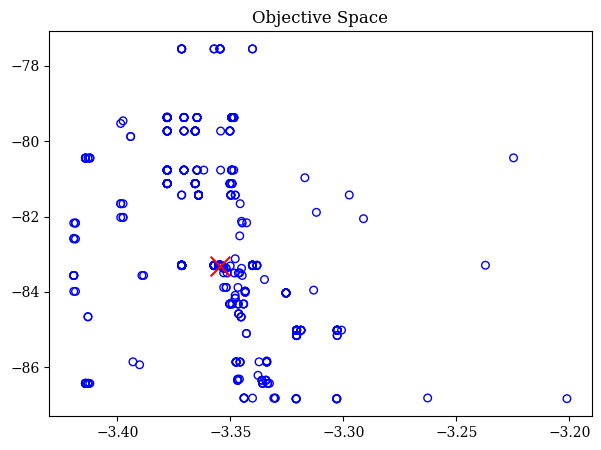

In [40]:
print("Best regarding ASF: Point \ni = %s\nF = %s" % (i, F[i]))
plt.figure(figsize=(7, 5))
plt.scatter(F[:, 0], F[:, 1], s=30, facecolors='none', edgecolors='blue')
plt.scatter(F[i, 0], F[i, 1], marker="x", color="red", s=200)
plt.title("Objective Space")
plt.show()

In [41]:
X[i]

array([2.52594893e+03, 4.86679704e+01, 1.26698339e+01, 0.00000000e+00,
       3.99996333e+01, 5.68841727e+00, 3.87298421e+01, 8.70710614e+00,
       3.62597888e+00, 2.73570779e+03, 4.63882234e+01, 2.14173209e+01,
       0.00000000e+00, 6.15311390e+01, 1.83271025e+01, 0.00000000e+00,
       0.00000000e+00, 2.62707003e+03, 1.82765429e+00, 1.28904359e+01,
       3.88344532e+00, 5.78592027e+00, 2.34312057e+00, 2.84630762e+03,
       4.77239496e+01, 5.41776217e+00, 3.71622310e+00, 2.53497067e+01,
       1.28786341e+01, 2.34606053e+03, 0.00000000e+00, 7.20586080e+01,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 9.49793708e-01,
       7.38092921e+01])

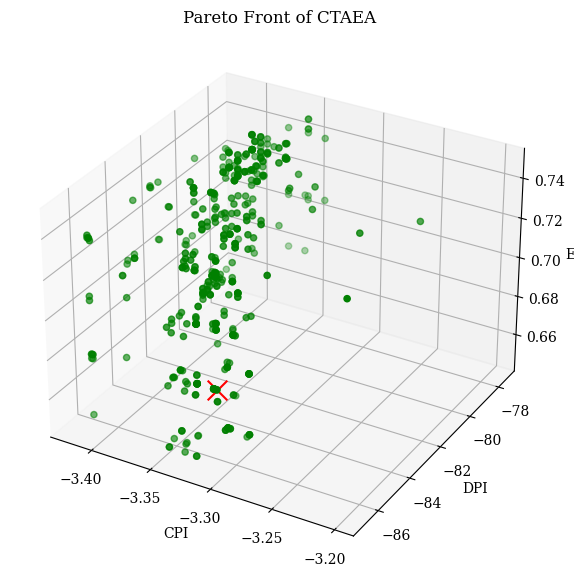

In [42]:
# Import libraries
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt

# Creating figure
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
ax.set_xlabel('CPI')
ax.set_ylabel('DPI')
ax.set_zlabel('EC')

# Creating plot
ax.scatter3D(F[:, 0], F[:, 1], F[:, 2], color = "green")
ax.scatter3D(F[i, 0], F[i, 1], F[i, 2], marker="x", color="red", s=200)
plt.title("Pareto Front of CTAEA")

# show plot
plt.show()

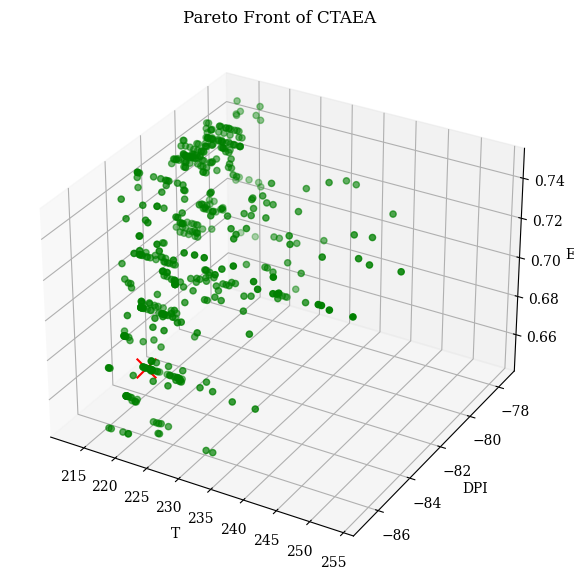

In [43]:
# Import libraries
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt

# Creating figure
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
ax.set_xlabel('T')
ax.set_ylabel('DPI')
ax.set_zlabel('EC')

# Creating plot
ax.scatter3D(F[:, 3], F[:, 1], F[:, 2], color = "green")
ax.scatter3D(F[i, 3], F[i, 1], F[i, 2], marker="x", color="red", s=200)
plt.title("Pareto Front of CTAEA")

# show plot
plt.show()

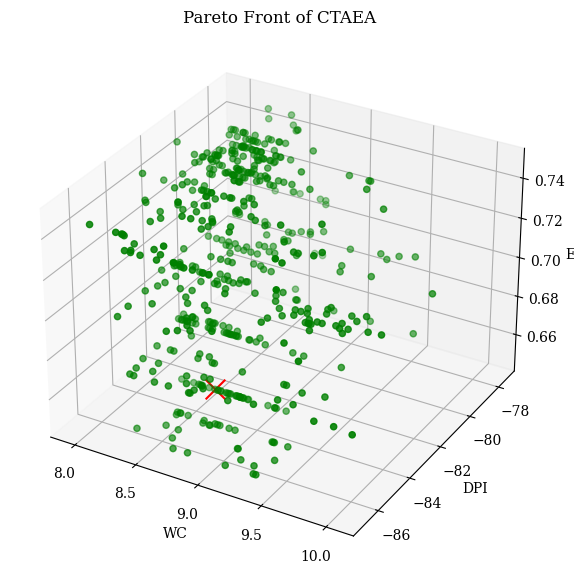

In [44]:
# Import libraries
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt

# Creating figure
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
ax.set_xlabel('WC')
ax.set_ylabel('DPI')
ax.set_zlabel('EC')

# Creating plot
ax.scatter3D(F[:, 4], F[:, 1], F[:, 2], color = "green")
ax.scatter3D(F[i, 4], F[i, 1], F[i, 2], marker="x", color="red", s=200)
plt.title("Pareto Front of CTAEA")

# show plot
plt.show()